<a href="https://colab.research.google.com/github/vahehambardzumyan/nlp_recommendation_system/blob/main/ML_MiniProject1_Vahe_Hamabardzumyan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Armenian News website analysis**

![a](https://wallpapers.com/images/hd/vintage-newspaper-5s06sfhqd9915v0v.jpg)


# 0. Problem Statement



Improve Armenian NLP quality: Current LLMs perform poorly in

*   Armenian because they are trained on limited and low-quality Armenian datasets. Analyzing real news text helps identify linguistic patterns and improve future Armenian NLP models.
*   Understand how media shapes public perception: Armenian news frequently covers sensitive political, economic, and security issues. Automated analysis helps map how tone, bias, and sentiment evolve over time.






# 1 . Data **Scraping**

Scrapping data using BeautifulSoup. Below is just a simple example.

In [ ]:
!pip install -q selenium beautifulsoup4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.0/512.0 kB 20.4 MB/s eta 0:00:00


In [ ]:
url = f"https://www.panarmenian.net/arm/news/328247/"
page = requests.get(url, timeout=10)
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html itemscope="" itemtype="http://schema.org/Article" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://ogp.me/ns/fb#"><head><title>Լևոն Ռուբինյանը ամփոփել է Ամիօ բանկի գործունեության 2 տարին - PanARMENIAN.Net</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="Նա նշել է, որ Ամիօի գլխավոր ձեռքբերումը հաճախորդների վստահությունն է" name="Description"/><meta content="608515112,1611140716,1359798221" property="fb:admins"/><meta content="69355249283" property="fb:page_id"/><meta content="199291153450600" property="fb:app_id"/><meta content="Լևոն Ռուբինյանը ամփոփել է Ամիօ բանկի գործունեության 2 տարին " property="og:title"/><meta content="PanARMENIAN.Net" property="og:site_name"/><meta content="https://media.pn.am/media/issue/328/247/photo/339x226_thumb_photo_328247_fada3d8ed.jpg" property="og:image"

I choose the website https://www.panarmenian.net/arm/news.
For this website I choose id,  title, date, body, images, videos, author and category. I put them into a pandas dataframe.

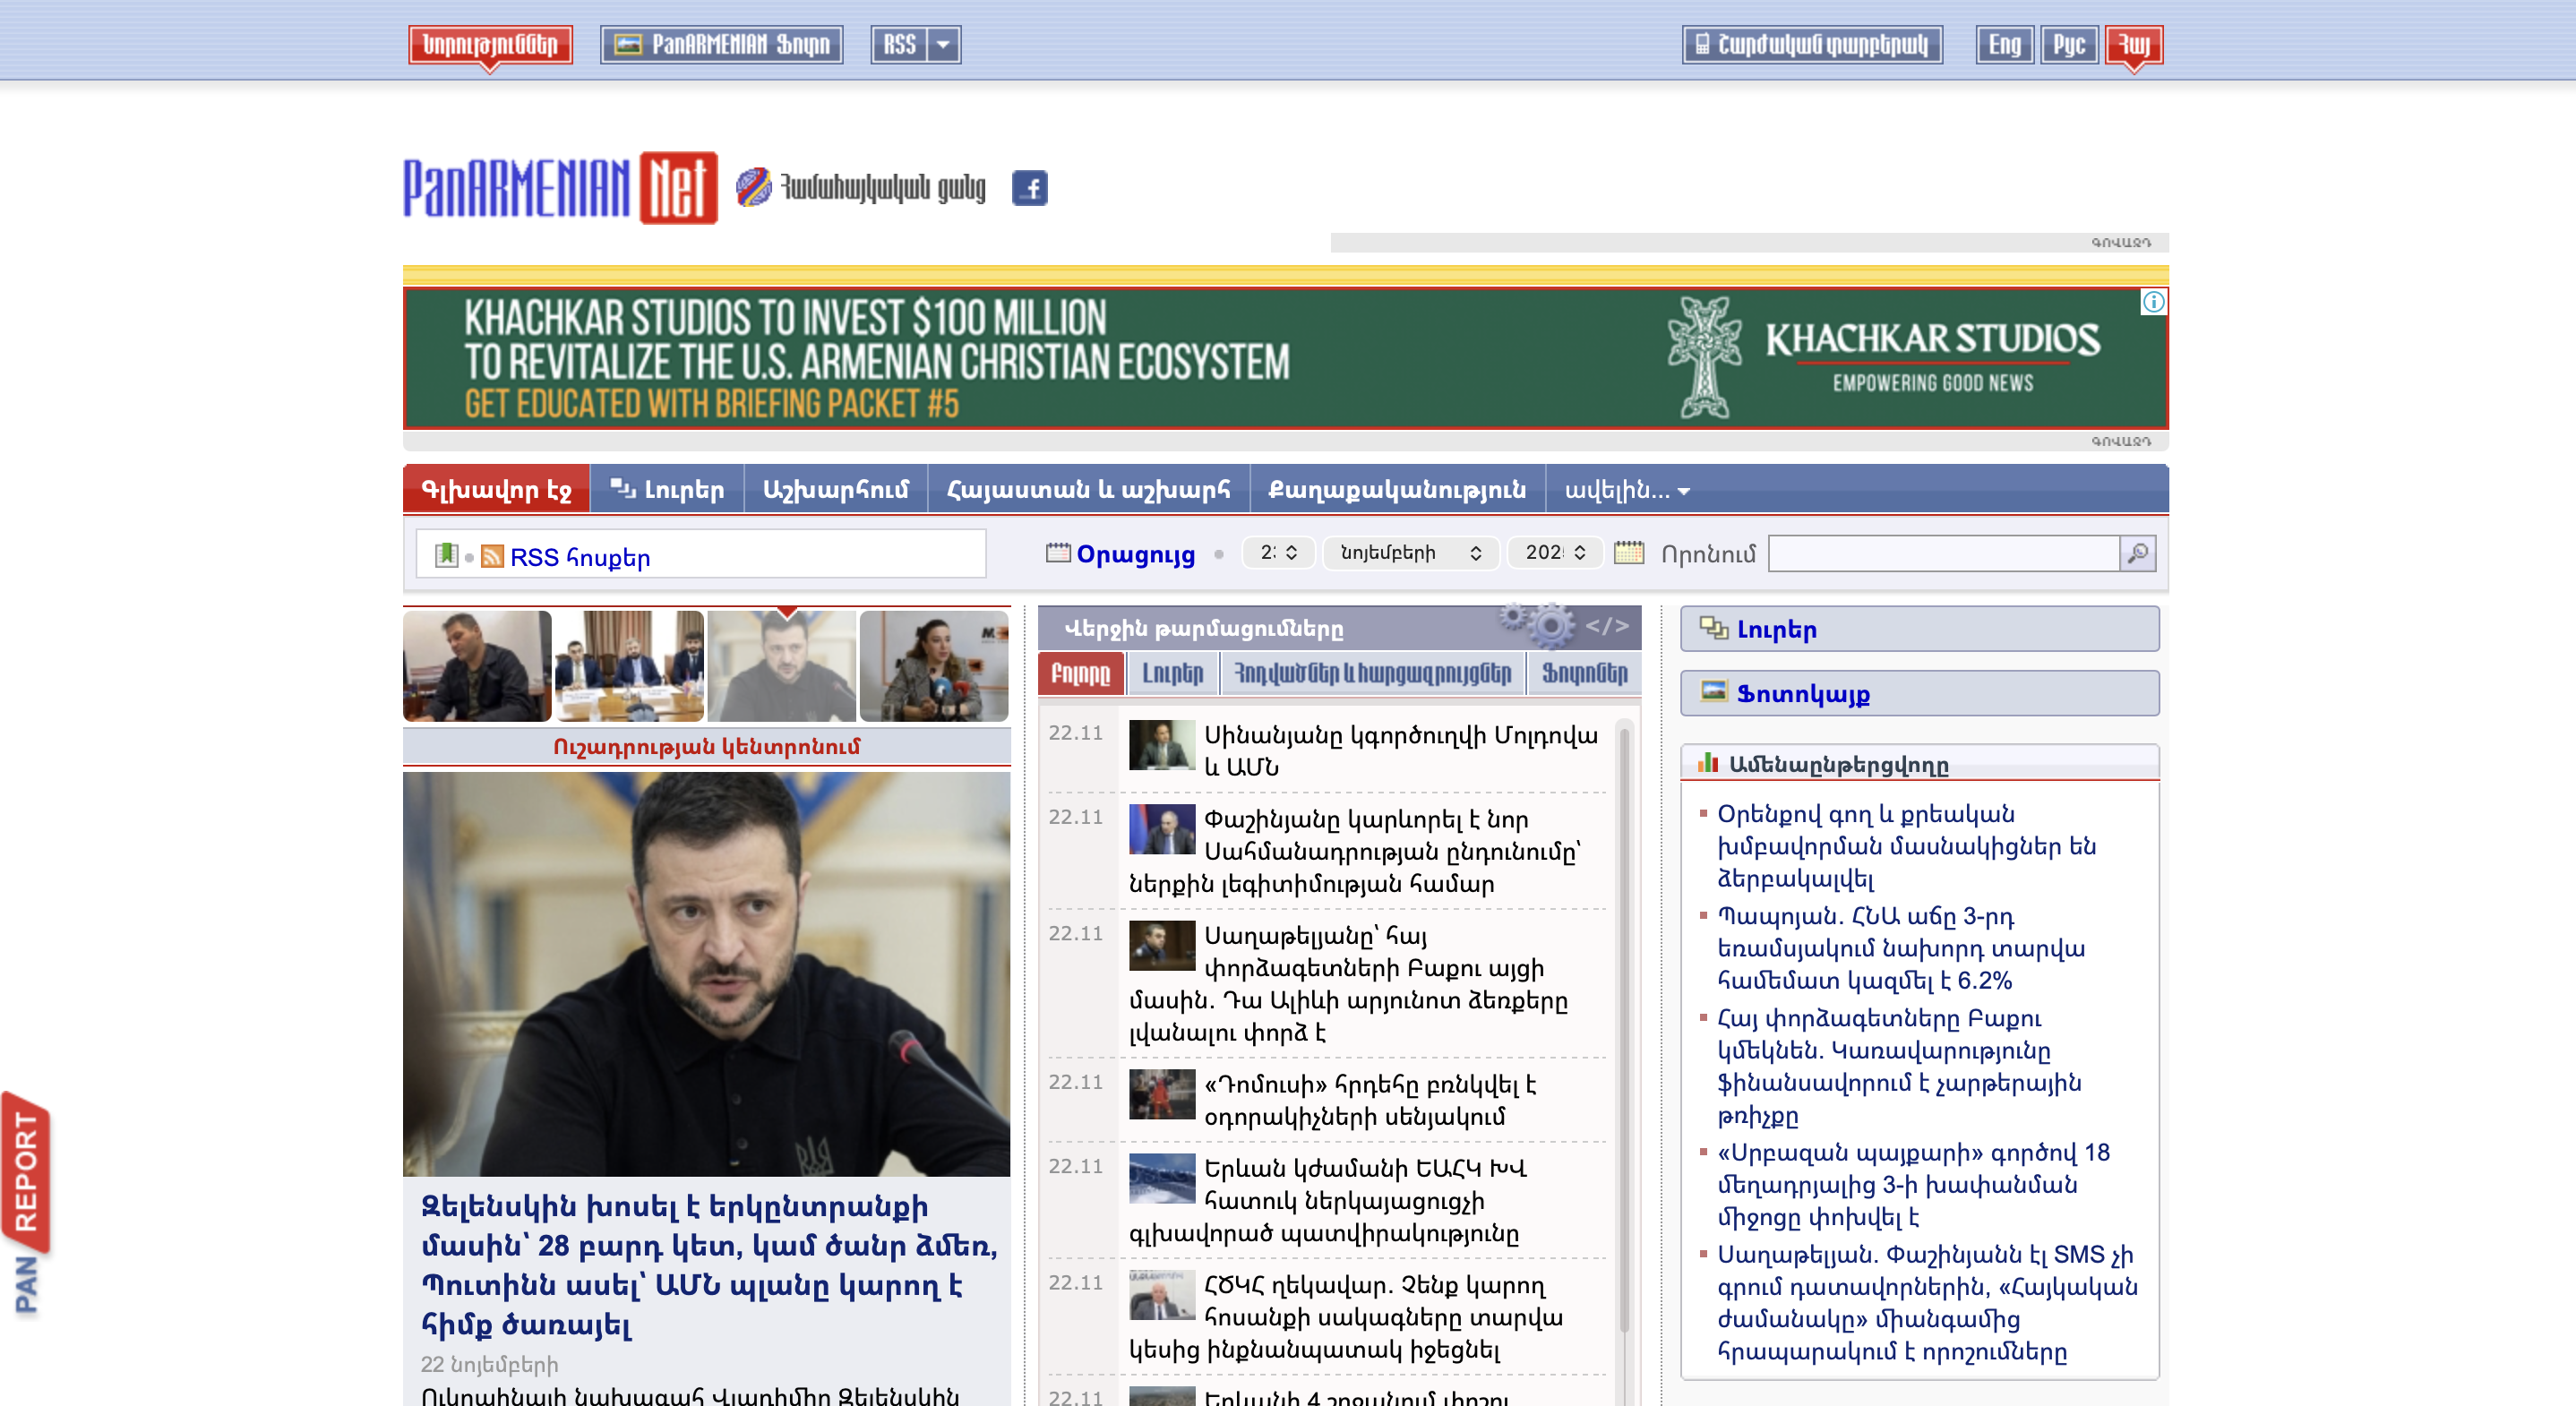

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import sleep

data = {
    "id": [],
    "title": [],
    "datetime": [],
    "author": [],
    "body": [],
    "images": [],
    "category": [],
    "videos": []
}

for i in range(323252, 328252):
    url = f"https://www.panarmenian.net/arm/news/{i}/"
    print(f"Scraping {url} ...")
    try:
        page = requests.get(url, timeout=10)
        if page.status_code != 200:
            print(f"⚠️ Skipping {i} (status code {page.status_code})")
            continue

        soup = BeautifulSoup(page.text, "html.parser")

        # Check if article exists (e.g., page not found)
        if soup.find("title") and "404" in soup.find("title").text:
            print(f"🚫 Article {i} not found")
            continue

        # Extract fields safely
        title = soup.find('h1', class_='article_title')
        datetime_tag = soup.find('div', class_='article_date')
        body_div = soup.find('div', class_='article_body')
        selected_menu = soup.select_one('.menu_item.selected a')

        data["id"].append(i)
        data["title"].append(title.get_text(strip=True) if title else None)
        data["datetime"].append(datetime_tag.get_text(strip=True) if datetime_tag else None)

        author_tag = soup.select_one('.article_body strong')
        data["author"].append(author_tag.get_text(strip=True) if author_tag else None)

        if body_div:
            paragraphs = body_div.find_all('p')
            data["body"].append(' '.join(p.get_text(strip=True) for p in paragraphs))
            data["images"].append([img['src'] for img in body_div.find_all('img', src=True)])
        else:
            data["body"].append(None)
            data["images"].append([])

        data["category"].append(selected_menu.get_text(strip=True) if selected_menu else None)
        data["videos"].append([v['src'] for v in soup.find_all(['iframe', 'video'], src=True)])

    except Exception as e:
        print(f"❌ Error scraping article {i}: {e}")
        # Add None placeholders to keep data aligned
$

    sleep(0.5)  # Small delay to avoid being blocked

# Convert to DataFrame
df = pd.DataFrame(data)
print(df.info())
print(df.head())


Streaming output truncated to the last 5000 lines.
Scraping https://www.panarmenian.net/arm/news/323299/ ...
Scraping https://www.panarmenian.net/arm/news/323300/ ...
Scraping https://www.panarmenian.net/arm/news/323301/ ...
Scraping https://www.panarmenian.net/arm/news/323302/ ...
Scraping https://www.panarmenian.net/arm/news/323303/ ...
Scraping https://www.panarmenian.net/arm/news/323304/ ...
Scraping https://www.panarmenian.net/arm/news/323305/ ...
Scraping https://www.panarmenian.net/arm/news/323306/ ...
Scraping https://www.panarmenian.net/arm/news/323307/ ...
Scraping https://www.panarmenian.net/arm/news/323308/ ...
Scraping https://www.panarmenian.net/arm/news/323309/ ...
Scraping https://www.panarmenian.net/arm/news/323310/ ...
Scraping https://www.panarmenian.net/arm/news/323311/ ...
Scraping https://www.panarmenian.net/arm/news/323312/ ...
Scraping https://www.panarmenian.net/arm/news/323313/ ...
Scraping https://www.panarmenian.net/arm/news/323314/ ...
Scraping https://www.

In [ ]:
df.to_csv('panarmenian_news.csv', index=False)

In [ ]:
df_copy=df.copy()

In [ ]:
df= pd.read_csv('panarmenian_news.csv')

# 2 .  EDA and Data Cleaning

## 2.1 Data Cleaning

In [ ]:
import pandas as pd
df = pd.read_excel('panarmenian_news.xlsx', header=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4996 non-null   int64 
 1   title     4912 non-null   object
 2   datetime  4912 non-null   object
 3   author    4909 non-null   object
 4   body      4912 non-null   object
 5   images    4996 non-null   object
 6   category  4912 non-null   object
 7   videos    4996 non-null   object
dtypes: int64(1), object(7)
memory usage: 312.4+ KB


In [ ]:
df.head()

id                                              title  \
0  323252  Սիմոնյանը հավանություն է տվել Օհանյանի և Մինաս...   
1  323253  Միրզոյանն ու ՅՈՒՆԵՍԿՕ-ի ղեկավարը քննարկել են Լ...   
2  323254  Փաշինյանն անցնում է «Վեհարանն ազատելու գործուն...   
3  323255  «Հանուն Հանրապետության» կուսակցությունը ստորագ...   
4  323256   Վճռաբեկը մերժել է բողոքը․ Չարչյանը չի ազատազրկվի   

                      datetime           author  \
0  10 հունիսի 2025 - 11:13 AMT  PanARMENIAN.Net   
1  10 հունիսի 2025 - 11:16 AMT  PanARMENIAN.Net   
2  10 հունիսի 2025 - 11:40 AMT  PanARMENIAN.Net   
3  10 հունիսի 2025 - 11:50 AMT  PanARMENIAN.Net   
4  10 հունիսի 2025 - 12:03 AMT  PanARMENIAN.Net   

                                                body  \
0  PanARMENIAN.Net-  Ազգային ժողովի նախագահԱլեն Ս...   
1  PanARMENIAN.Net-  ՀՀ ԱԳ նախարարԱրարատ Միրզոյան...   
2  PanARMENIAN.Net-  ՎարչապետՆիկոլ Փաշինյանըֆեյսբ...   
3  PanARMENIAN.Net-«Հանուն Հանրապետության»կուսակց...   
4  PanARMENIAN.Net-  4 տարի տևած քրեական գործընթա...   

                                              images          category videos  
0  ['https://media.pn.am/media/issue/323/252/phot...  Քաղաքականություն     []  
1  ['https://media.pn.am/media/issue/323/253/phot...  Քաղաքականություն     []  
2  ['https://media.pn.am/media/issue/323/254/phot...  Քաղաքականություն     []  
3  ['https://media.pn.am/media/issue/323/255/phot...  Քաղաքականություն     []  
4  ['https://media.pn.am/media/issue/323/256/phot...    Հասարակություն     []

In [ ]:
df.isnull().sum()

id           0
title       84
datetime    84
author      87
body        84
images       0
category    84
videos       0
dtype: int64

First of all I delete the full nullish articles.

In [ ]:
df.dropna(subset=['title'], inplace=True)

In [ ]:
df.isnull().sum()

id          0
title       0
datetime    0
author      3
body        0
images      0
category    0
videos      0
dtype: int64

The Author section gives us nothing , so I delte it also.

In [ ]:
pd.unique(df['author'])

array(['PanARMENIAN.Net', nan], dtype=object)

In [ ]:
df.drop(columns=['author'], inplace=True)

In [ ]:
df.isnull().sum()

id          0
title       0
datetime    0
body        0
images      0
category    0
videos      0
dtype: int64

The date come to us in armenian, I chnged to "YYYY-MM-DD" format.

In [ ]:
import pandas as pd
import numpy as np

arm_months = {
    "հունվարի": 1,
    "փետրվարի": 2,
    "մարտի": 3,
    "ապրիլի": 4,
    "մայիսի": 5,
    "հունիսի": 6,
    "հուլիսի": 7,
    "օգոստոսի": 8,
    "սեպտեմբերի": 9,
    "հոկտեմբերի": 10,
    "նոյեմբերի": 11,
    "դեկտեմբերի": 12
}

def convert_arm_datetime(s):
    # Handle None, NaN, empty string
    if pd.isna(s) or s is None or str(s).strip() == "":
        return None

    try:
        # Split date and time
        date_part, time_part = s.split('-')
        date_part = date_part.strip()
        time_part = time_part.strip()

        # Parse date
        day, month_arm, year = date_part.split()
        month_num = arm_months.get(month_arm)

        if month_num is None:   # unknown month
            return None

        # Clean time (remove AMT)
        time_part = time_part.replace("AMT", "").strip()

        # Auto-detect HH:MM or HH:MM:SS
        t_parts = time_part.split(':')
        if len(t_parts) == 2:
            hour, minute = t_parts
            second = "00"
        elif len(t_parts) == 3:
            hour, minute, second = t_parts
        else:
            return None

        # Build final datetime string
        return f"{year}-{month_num:02d}-{int(day):02d} {hour}:{minute}:{second}"

    except:
        return None  # return None if parsing fails


df["datetime_changed"] = df["datetime"].apply(convert_arm_datetime)


In [ ]:
df.drop(columns=['datetime'], inplace=True)
df.rename(columns={'datetime_changed': 'datetime'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4912 entries, 0 to 4995
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4912 non-null   int64 
 1   title     4912 non-null   object
 2   body      4912 non-null   object
 3   images    4912 non-null   object
 4   category  4912 non-null   object
 5   videos    4912 non-null   object
 6   datetime  4912 non-null   object
dtypes: int64(1), object(6)
memory usage: 307.0+ KB


Deleteing the first inuseful suffix from body text.

In [ ]:
df['body']= df['body'].str.replace('PanARMENIAN.Net- ', '')
df['body']= df['body'].str.replace('PanARMENIAN.Net-', '')

In [ ]:
df.head()

id                                              title  \
0  323252  Սիմոնյանը հավանություն է տվել Օհանյանի և Մինաս...   
1  323253  Միրզոյանն ու ՅՈՒՆԵՍԿՕ-ի ղեկավարը քննարկել են Լ...   
2  323254  Փաշինյանն անցնում է «Վեհարանն ազատելու գործուն...   
3  323255  «Հանուն Հանրապետության» կուսակցությունը ստորագ...   
4  323256   Վճռաբեկը մերժել է բողոքը․ Չարչյանը չի ազատազրկվի   

                                                body  \
0   Ազգային ժողովի նախագահԱլեն Սիմոնյանը համաձայն...   
1   ՀՀ ԱԳ նախարարԱրարատ Միրզոյանըհանդիպում է ունե...   
2   ՎարչապետՆիկոլ Փաշինյանըֆեյսբուքյան իր էջումհա...   
3  «Հանուն Հանրապետության»կուսակցությունընախաձեռն...   
4   4 տարի տևած քրեական գործընթացն ընդդեմ պրոֆեսո...   

                                              images          category videos  \
0  ['https://media.pn.am/media/issue/323/252/phot...  Քաղաքականություն     []   
1  ['https://media.pn.am/media/issue/323/253/phot...  Քաղաքականություն     []   
2  ['https://media.pn.am/media/issue/323/254/phot...  Քաղաքականություն     []   
3  ['https://media.pn.am/media/issue/323/255/phot...  Քաղաքականություն     []   
4  ['https://media.pn.am/media/issue/323/256/phot...    Հասարակություն     []   

              datetime  
0  2025-06-10 11:13:00  
1  2025-06-10 11:16:00  
2  2025-06-10 11:40:00  
3  2025-06-10 11:50:00  
4  2025-06-10 12:03:00

For Images and videos, I need to save just their quantity. So I transfore them too. I also checked if some article contains carousel , I also save them.


In [ ]:
df[df['videos'].str.len() > 0]

id                                              title  \
0     323252  Սիմոնյանը հավանություն է տվել Օհանյանի և Մինաս...   
1     323253  Միրզոյանն ու ՅՈՒՆԵՍԿՕ-ի ղեկավարը քննարկել են Լ...   
2     323254  Փաշինյանն անցնում է «Վեհարանն ազատելու գործուն...   
3     323255  «Հանուն Հանրապետության» կուսակցությունը ստորագ...   
4     323256   Վճռաբեկը մերժել է բողոքը․ Չարչյանը չի ազատազրկվի   
...      ...                                                ...   
4991  328247  Լևոն Ռուբինյանը ամփոփել է Ամիօ բանկի գործունեո...   
4992  328248  Մելիքյանը ներողություն է խնդրել հավաքականի պար...   
4993  328249  Հետախուզվող տղամարդը ինքնակամ վերադարձել է Հայ...   
4994  328250  Գրիգորյանը տեսակապով մասնակցել է ԵՏՀ խորհրդի ն...   
4995  328251  Վեդիի ավագանին կողմ է քվեարկել Կարմիր սարում հ...   

                                                   body  \
0      Ազգային ժողովի նախագահԱլեն Սիմոնյանը համաձայն...   
1      ՀՀ ԱԳ նախարարԱրարատ Միրզոյանըհանդիպում է ունե...   
2      ՎարչապետՆիկոլ Փաշինյանըֆեյսբուքյան իր էջումհա...   
3     «Հանուն Հանրապետության»կուսակցությունընախաձեռն...   
4      4 տարի տևած քրեական գործընթացն ընդդեմ պրոֆեսո...   
...                                                 ...   
4991  Ամիօ բանկիվարչության նախագահի առաջին տեղակալ, ...   
4992   Հայաստանի ազգային հավաքականի գլխավոր մարզիչԵղ...   
4993   Վաղարշապատի համայնքային ոստիկանության բաժնի ա...   
4994   Փոխվարչապետ Մհեր Գրիգորյանն առցանց ձևաչափով մ...   
4995   Արարատի մարզիՎեդի համայնքի ավագանին, համայնքա...   

                                                 images          category  \
0     ['https://media.pn.am/media/issue/323/252/phot...  Քաղաքականություն   
1     ['https://media.pn.am/media/issue/323/253/phot...  Քաղաքականություն   
2     ['https://media.pn.am/media/issue/323/254/phot...  Քաղաքականություն   
3     ['https://media.pn.am/media/issue/323/255/phot...  Քաղաքականություն   
4     ['https://media.pn.am/media/issue/323/256/phot...    Հասարակություն   
...                                                 ...               ...   
4991  ['https://media.pn.am/media/issue/328/247/phot...      Տնտեսություն   
4992  ['https://media.pn.am/media/issue/328/248/phot...             Սպորտ   
4993  ['https://media.pn.am/media/issue/328/249/phot...    Հասարակություն   
4994  ['https://media.pn.am/media/issue/328/250/phot...      Տնտեսություն   
4995  ['https://media.pn.am/media/issue/328/251/phot...      Տնտեսություն   

                                             videos             datetime  
0                                                []  2025-06-10 11:13:00  
1                                                []  2025-06-10 11:16:00  
2                                                []  2025-06-10 11:40:00  
3                                                []  2025-06-10 11:50:00  
4                                                []  2025-06-10 12:03:00  
...                                             ...                  ...  
4991  ['https://www.youtube.com/embed/1R0Wg9kusII']  2025-11-19 17:48:00  
4992                                             []  2025-11-19 17:52:00  
4993                                             []  2025-11-19 17:58:00  
4994                                             []  2025-11-19 18:12:00  
4995                                             []  2025-11-19 18:17:00  

[4912 rows x 7 columns]

In [ ]:
df['has_video'] = df['videos'].apply(lambda x: 1 if isinstance(x, list) and len(x) > 0 else 0)
df.drop(columns=['videos'], inplace=True)

In [ ]:
df['has_carousell'] = df['images'].apply(
    lambda imgs: 1 if isinstance(imgs, list) and "https://static.pn.am/images/scroll_l.gif" in imgs else 0
)

In [ ]:
import ast
df['images_count'] = df['images'].apply(lambda x: len(ast.literal_eval(x)) if pd.notna(x) else 0)

In [ ]:
df.drop(columns=['images'], inplace=True)

As I havent view count data, I adde some 'sintetic' collumn to do EDA.

In [ ]:
df['title_word_count'] = df['title'].str.split().str.len()

In [ ]:
df['body_word_count'] = df['body'].str.split().str.len()


In [ ]:
df.head()

id                                              title  \
0  323252  Սիմոնյանը հավանություն է տվել Օհանյանի և Մինաս...   
1  323253  Միրզոյանն ու ՅՈՒՆԵՍԿՕ-ի ղեկավարը քննարկել են Լ...   
2  323254  Փաշինյանն անցնում է «Վեհարանն ազատելու գործուն...   
3  323255  «Հանուն Հանրապետության» կուսակցությունը ստորագ...   
4  323256   Վճռաբեկը մերժել է բողոքը․ Չարչյանը չի ազատազրկվի   

                                                body          category  \
0   Ազգային ժողովի նախագահԱլեն Սիմոնյանը համաձայն...  Քաղաքականություն   
1   ՀՀ ԱԳ նախարարԱրարատ Միրզոյանըհանդիպում է ունե...  Քաղաքականություն   
2   ՎարչապետՆիկոլ Փաշինյանըֆեյսբուքյան իր էջումհա...  Քաղաքականություն   
3  «Հանուն Հանրապետության»կուսակցությունընախաձեռն...  Քաղաքականություն   
4   4 տարի տևած քրեական գործընթացն ընդդեմ պրոֆեսո...    Հասարակություն   

              datetime  has_video  has_carousell  images_count  \
0  2025-06-10 11:13:00          0              0             1   
1  2025-06-10 11:16:00          0              0             1   
2  2025-06-10 11:40:00          0              0             1   
3  2025-06-10 11:50:00          0              0             1   
4  2025-06-10 12:03:00          0              0             1   

   title_word_count  body_word_count  
0                11               56  
1                10              212  
2                13              418  
3                11               57  
4                 7              118

##2.2 EDA




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4912 entries, 0 to 4995
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                4912 non-null   int64 
 1   title             4912 non-null   object
 2   body              4912 non-null   object
 3   category          4912 non-null   object
 4   datetime          4912 non-null   object
 5   has_video         4912 non-null   int64 
 6   has_carousell     4912 non-null   int64 
 7   images_count      4912 non-null   int64 
 8   title_word_count  4912 non-null   int64 
 9   body_word_count   4912 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 551.2+ KB


In [ ]:
df.describe()

id  has_video  has_carousell  images_count  \
count    4912.000000     4912.0         4912.0   4912.000000   
mean   325753.517915        0.0            0.0      1.066979   
std      1442.517446        0.0            0.0      0.509523   
min    323252.000000        0.0            0.0      1.000000   
25%    324505.750000        0.0            0.0      1.000000   
50%    325749.500000        0.0            0.0      1.000000   
75%    327003.250000        0.0            0.0      1.000000   
max    328251.000000        0.0            0.0     12.000000   

       title_word_count  body_word_count  
count       4912.000000      4912.000000  
mean           9.656352       208.350977  
std            2.590961       137.886903  
min            3.000000         5.000000  
25%            8.000000       116.000000  
50%            9.000000       178.000000  
75%           11.000000       260.000000  
max           22.000000      1539.000000

Here we can see than in the image count we have i lot of outliers. The cause can be the advertisment in some article.

In [ ]:
import matplotlib.pyplot as plt

<Axes: xlabel='category'>

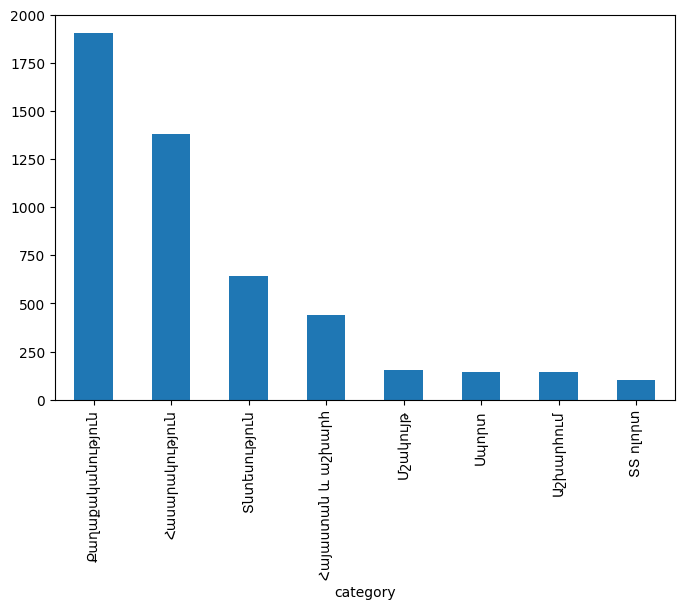

In [ ]:
plt.figure(figsize=(8,5))
df['category'].value_counts().plot(kind='bar')

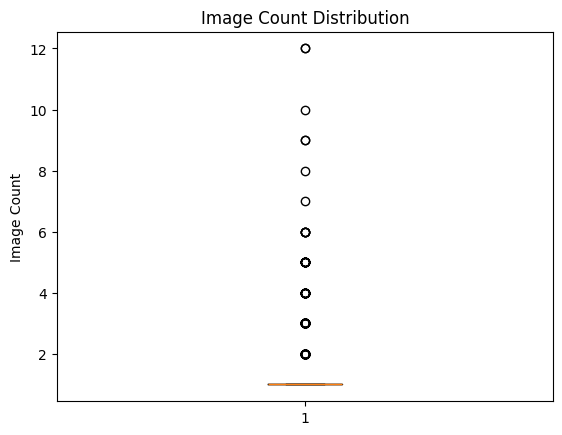

In [ ]:
plt.boxplot(df['images_count'])
plt.title('Image Count Distribution')
plt.ylabel('Image Count')
plt.show()

Here we can see than in the image count we have i lot of outliers. The cause can be the advertisment in some articles.



To handle outlier , I use IQR technique. Then I fill them with the mode of image count.

In [ ]:
pd.unique(df['images_count'])

array([ 1,  3,  2,  4,  5, 12, 10,  9,  8,  7,  6])

In [ ]:
Q1 = np.percentile(df['images_count'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['images_count'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['images_count'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)

Q1 25 percentile of the given data is,  1.0
Q1 50 percentile of the given data is,  1.0
Q1 75 percentile of the given data is,  1.0
Interquartile range is 0.0
Lower limit is 1.0
Upper limit is 1.0


In [ ]:
df['images_count'] = df['images_count'].where(
    df['images_count'].between(low_lim, up_lim), other=np.nan
)


In [ ]:
df['images_count'].fillna(df['images_count'].mode()[0])

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4991    1.0
4992    1.0
4993    1.0
4994    1.0
4995    1.0
Name: images_count, Length: 4912, dtype: float64

(array([2.063e+03, 2.045e+03, 5.580e+02, 1.630e+02, 4.300e+01, 2.900e+01,
        5.000e+00, 2.000e+00, 2.000e+00, 2.000e+00]),
 array([   5. ,  158.4,  311.8,  465.2,  618.6,  772. ,  925.4, 1078.8,
        1232.2, 1385.6, 1539. ]),
 <BarContainer object of 10 artists>)

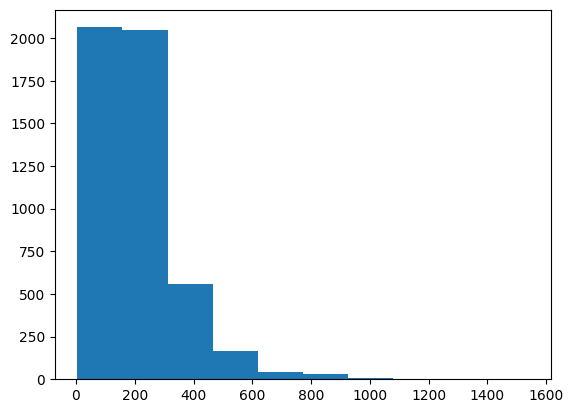

In [ ]:
plt.hist(df['body_word_count'])

(array([4.400e+01, 4.450e+02, 1.237e+03, 1.486e+03, 1.026e+03, 4.730e+02,
        1.500e+02, 4.100e+01, 9.000e+00, 1.000e+00]),
 array([ 3. ,  4.9,  6.8,  8.7, 10.6, 12.5, 14.4, 16.3, 18.2, 20.1, 22. ]),
 <BarContainer object of 10 artists>)

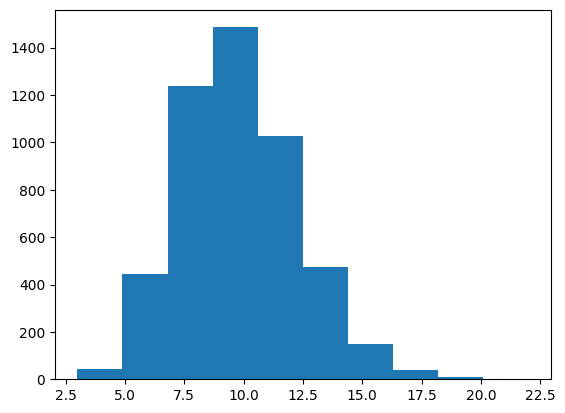

In [ ]:
plt.hist(df['title_word_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b8cf811c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b8cf817c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b8cf80f20>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b8cf81df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b8cf81f40>],
 'means': []}

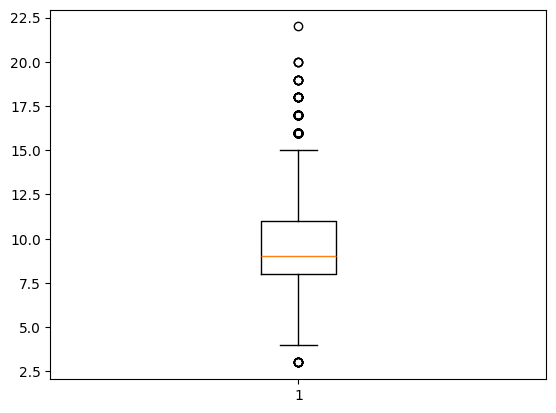

In [ ]:
plt.boxplot(df['title_word_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b8cf16570>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b8cf16a20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b99377c80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8b8cf16ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b8cf17320>],
 'means': []}

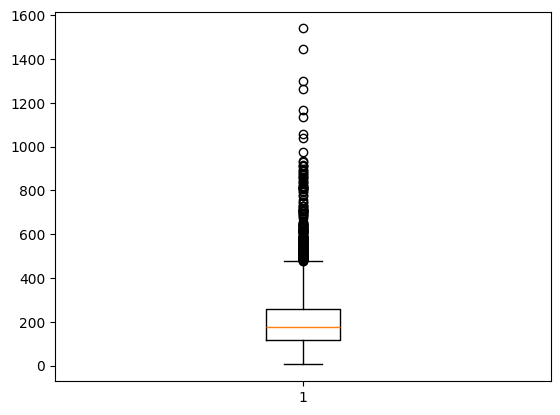

In [ ]:
plt.boxplot(df['body_word_count'])

Handling the same way the body word count. Idealy is not correct, but I do it for ANOVA.(I assume th bode word count is view count for demonstarate some techniques)

In [ ]:
Q1 = np.percentile(df['body_word_count'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['body_word_count'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['body_word_count'], 75, interpolation = 'midpoint')

print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('Lower limit is', low_lim)
print('Upper limit is', up_lim)

Q1 25 percentile of the given data is,  116.0
Q1 50 percentile of the given data is,  178.0
Q1 75 percentile of the given data is,  260.0
Interquartile range is 144.0
Lower limit is -100.0
Upper limit is 476.0


In [ ]:
df['body_word_count'].clip(lower=low_lim, upper=up_lim)

0        56
1       212
2       418
3        57
4       118
       ... 
4991    127
4992    114
4993     65
4994     38
4995    131
Name: body_word_count, Length: 4912, dtype: int64

Correlation matrix with numerical values.

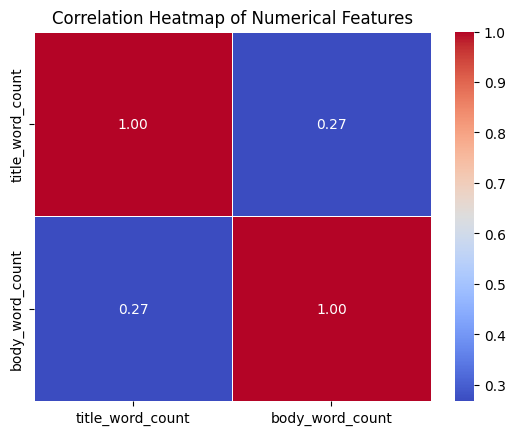

In [ ]:
import seaborn as sns

numerical_vars = ['title_word_count', 'body_word_count']

# Compute the correlation matrix
corr = df[numerical_vars].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

##2.3 Hypothesis Testing: ANOVA


*Null hypothesis (H₀):  There is no difference in the mean body_word_count between Politics, Sports, and Economy articles.*


*Alternative hypothesis (H₁): At least one category has a different mean body_word_count.*

In [ ]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Extract the groups
politics = df[df['category'] == 'Քաղաքականություն']['body_word_count']
sports   = df[df['category'] == 'Սպորտ']['body_word_count']
economy  = df[df['category'] == 'Տնտեսություն']['body_word_count']

# -----------------------------
# 1. ANOVA using scipy (quick F-test)
# -----------------------------
f_stat, p_value = stats.f_oneway(politics, sports, economy)

print("=== Scipy one-way ANOVA ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("→ Reject H0: There is a significant difference in mean body_word_count between categories.")
else:
    print("→ Fail to reject H0: No significant difference in mean body_word_count between categories.")

# -----------------------------
# 2. More detailed ANOVA table with statsmodels
# -----------------------------
# Create a temporary dataframe with only the needed columns
anova_df = df[df['category'].isin(['Քաղաքականություն', 'Սպորտ', 'Տնտեսություն'])][['category', 'body_word_count']].copy()

# Fit the model
model = ols('body_word_count ~ C(category)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n=== Statsmodels ANOVA table ===")
print(anova_table)

# -----------------------------
# 3. Post-hoc test (Tukey's HSD) - to see exactly which pairs differ
# -----------------------------
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=anova_df['body_word_count'],
                          groups=anova_df['category'],
                          alpha=0.05)

print("\n=== Tukey's HSD post-hoc test ===")
print(tukey)

=== Scipy one-way ANOVA ===
F-statistic: 35.7766
p-value: 0.0000
→ Reject H0: There is a significant difference in mean body_word_count between categories.

=== Statsmodels ANOVA table ===
                   sum_sq      df          F        PR(>F)
C(category)  1.389108e+06     2.0  35.776596  4.629674e-16
Residual     5.220326e+07  2689.0        NaN           NaN

=== Tukey's HSD post-hoc test ===
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1         group2      meandiff p-adj   lower   upper   reject
---------------------------------------------------------------------
       Սպորտ     Տնտեսություն  75.6597    0.0 45.3682 105.9512   True
       Սպորտ Քաղաքականություն  98.0374    0.0 69.6153 126.4595   True
Տնտեսություն Քաղաքականություն  22.3777 0.0013  7.4854    37.27   True
---------------------------------------------------------------------


/tmp/ipython-input-928096088.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='body_word_count', data=anova_df, palette='Set2', boxprops=dict(alpha=0.8))


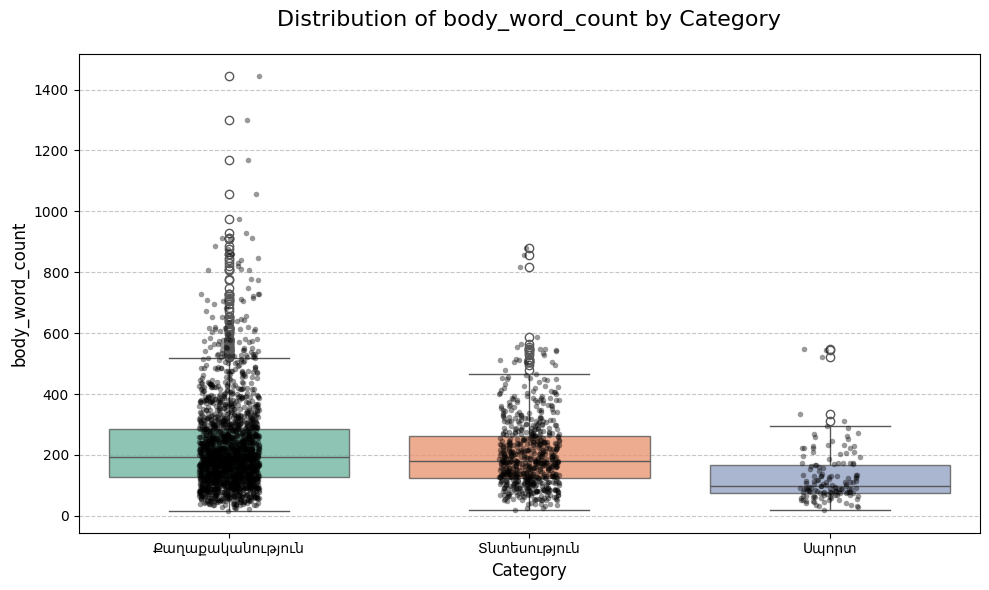

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='body_word_count', data=anova_df, palette='Set2', boxprops=dict(alpha=0.8))
sns.stripplot(x='category', y='body_word_count', data=anova_df, color='black', alpha=0.4, size=4)
plt.title('Distribution of body_word_count by Category', fontsize=16, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('body_word_count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Since p < 0.05 , we reject the null hypothesis (H₀) at the 5% significance level.
Interpretation:
The average length  of articles differs significantly depending on the category.


Sports articles are significantly shorter than both Politics and Economy articles (p < 0.001).
All three categories differ significantly from one another (all pairwise p-values < 0.05).

This finding indicates that editorial style, depth of coverage, or content requirements vary substantially across Politics, Sports, and Economy sections.

# **3. Time Series Analysis and  Forecasting**


##3.1 Time Series Analysis

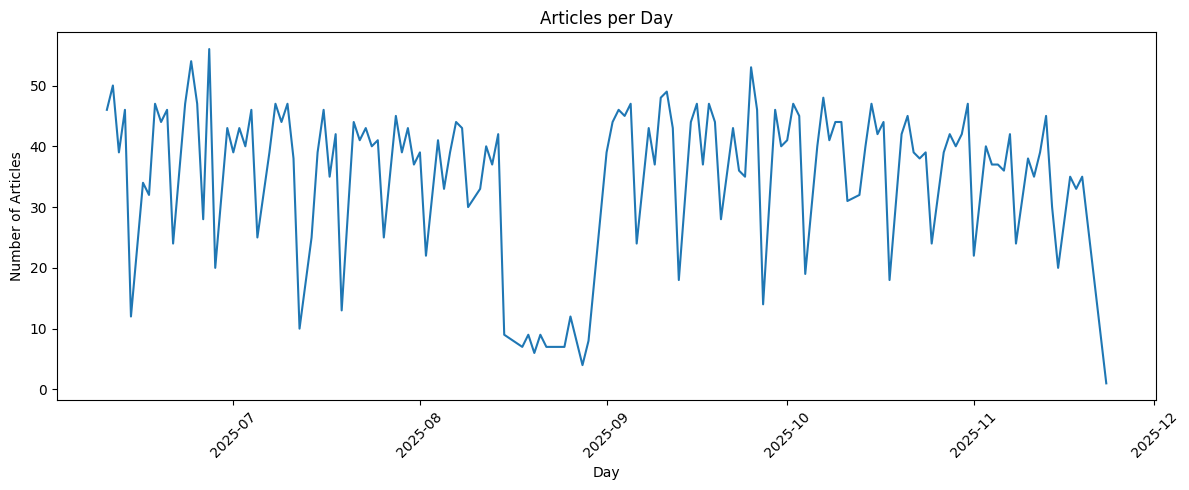

In [ ]:

import matplotlib.pyplot as plt

# 1. Make sure the date column is datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Count articles per day
daily_counts = df.groupby(df['datetime'].dt.date).size()

# 3. Plot the time-series
plt.figure(figsize=(12,5))
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Day')
plt.ylabel('Number of Articles')
plt.title('Articles per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Here we can see some outlier. In august the employees  was in vacation, or they have some trouble.

In [ ]:
pd.unique(df['category'])

array(['Քաղաքականություն', 'Հասարակություն', 'Տնտեսություն',
       'Հայաստան և աշխարհ', 'Մշակույթ', 'Սպորտ', 'Աշխարհում', 'ՏՏ ոլորտ'],
      dtype=object)

In [ ]:
politics = df.groupby('category').get_group('Քաղաքականություն')
sports = df.groupby('category').get_group('Սպորտ')
economy = df.groupby('category').get_group('Տնտեսություն')
IT = df.groupby('category').get_group('ՏՏ ոլորտ')
Armenia = df.groupby('category').get_group('Հայաստան և աշխարհ')
world = df.groupby('category').get_group('Աշխարհում')
culture = df.groupby('category').get_group('Մշակույթ')
society = df.groupby('category').get_group('Հասարակություն')

Here the demonstation of the time series of article count per category.

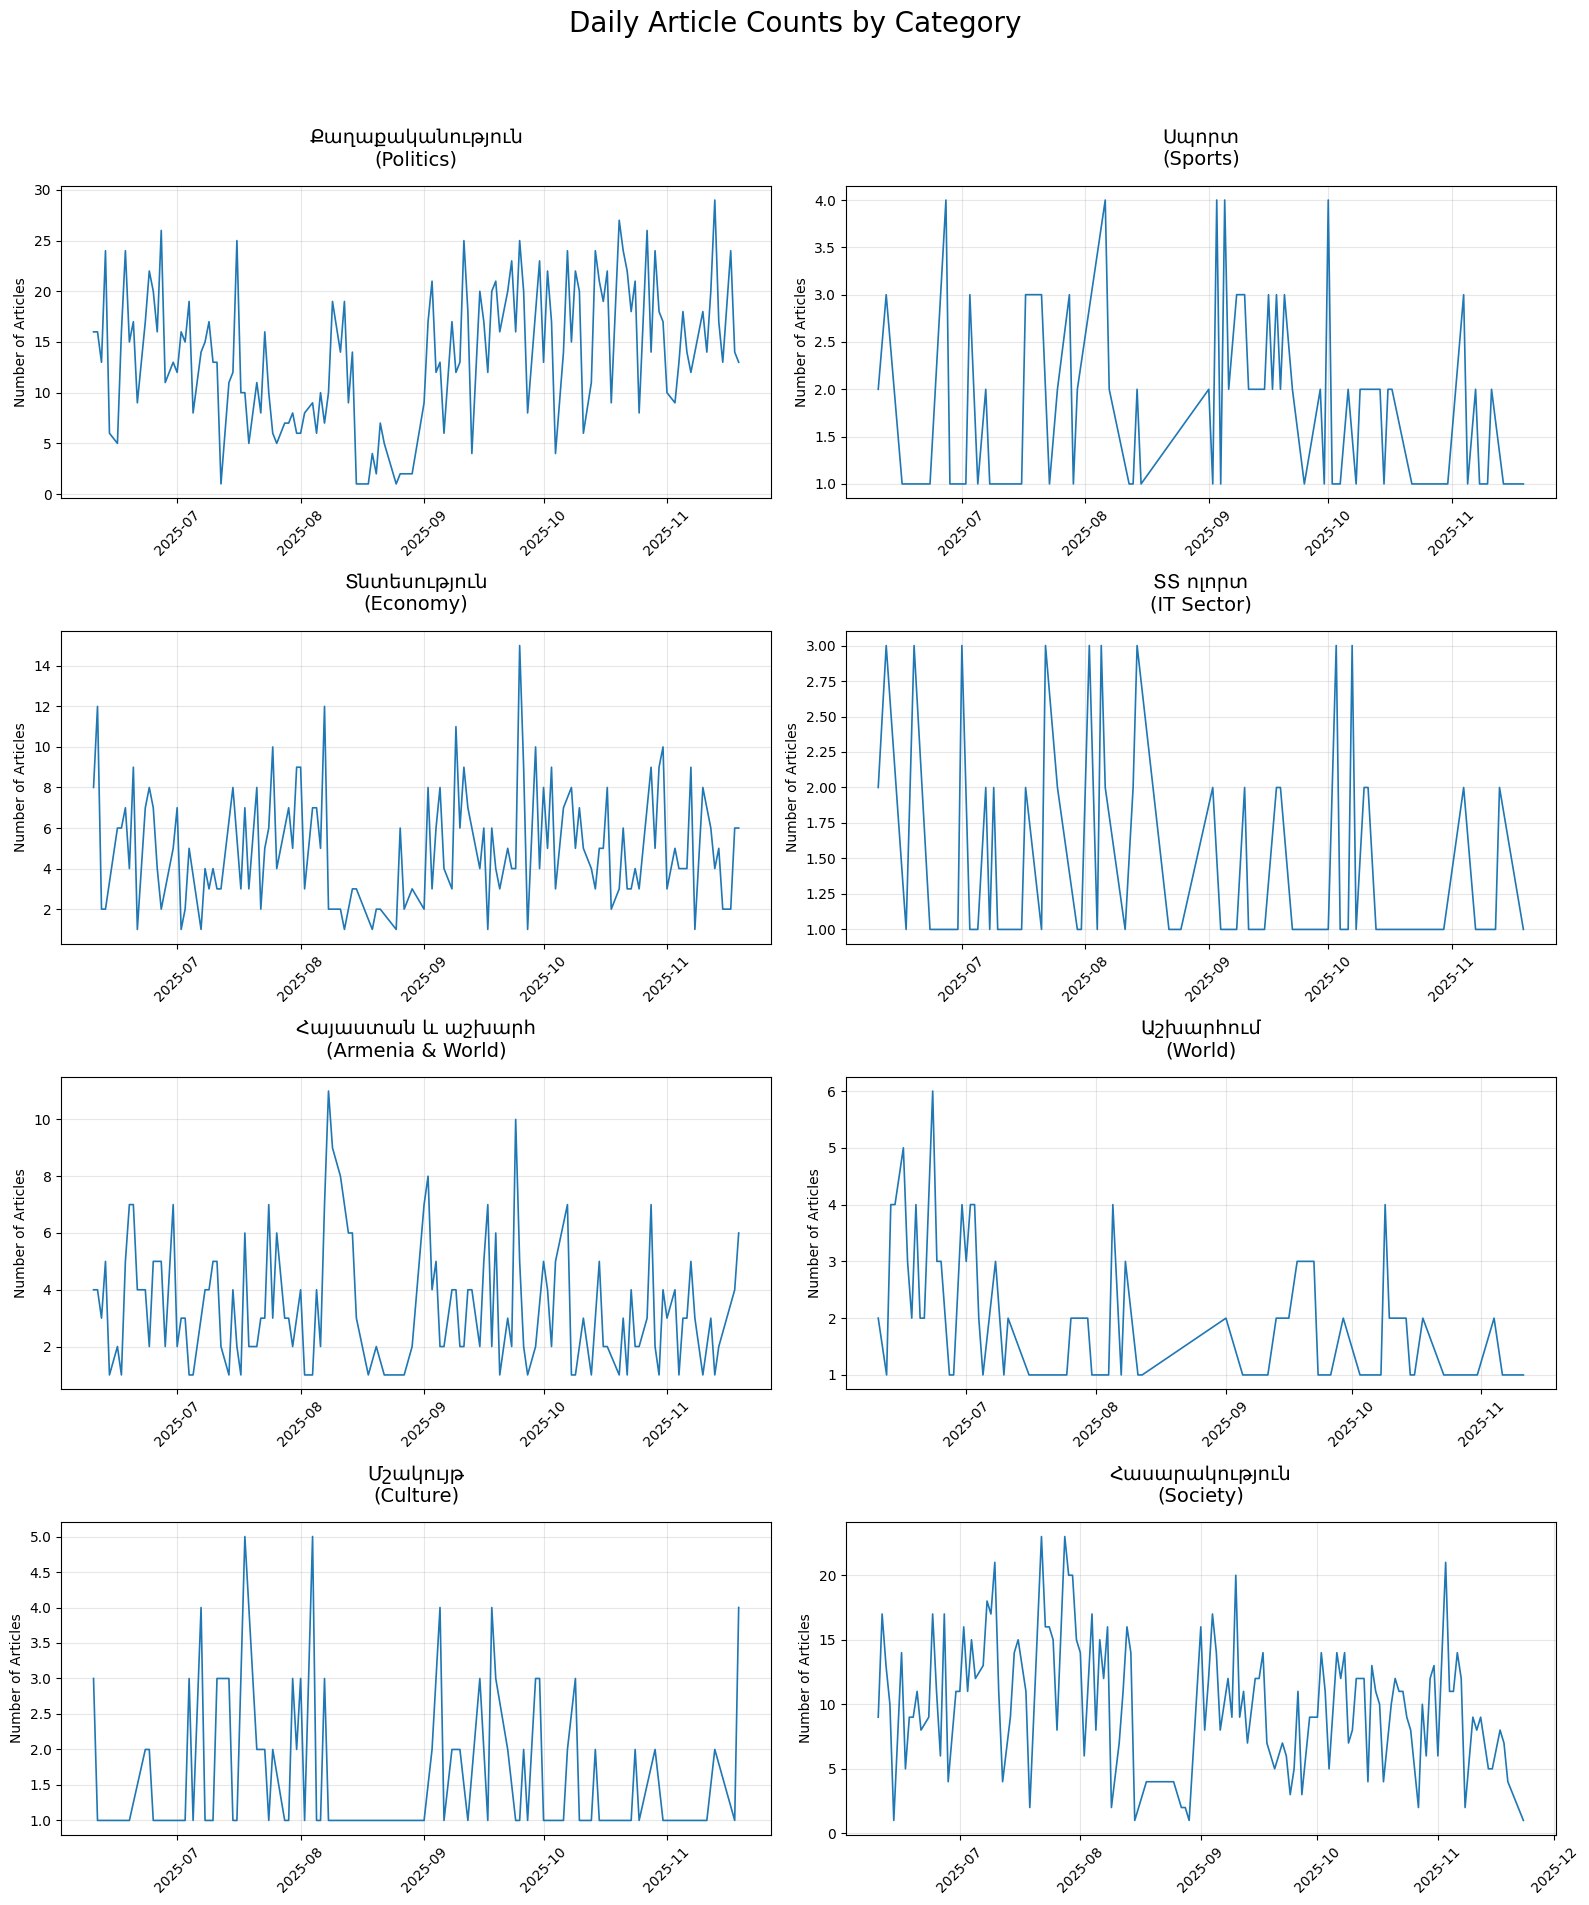

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# 1. Make sure the datetime column is properly parsed
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Group by category once (more efficient)
categories = {
    'Քաղաքականություն': 'Politics',
    'Սպորտ': 'Sports',
    'Տնտեսություն': 'Economy',
    'ՏՏ ոլորտ': 'IT Sector',
    'Հայաստան և աշխարհ': 'Armenia & World',
    'Աշխարհում': 'World',
    'Մշակույթ': 'Culture',
    'Հասարակություն': 'Society'
}

# Create a 4×2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()  # Makes indexing easier

for idx, (arm_name, eng_name) in enumerate(categories.items()):
    # Filter the category
    cat_df = df[df['category'] == arm_name].copy()

    # Count articles per day
    daily_counts = cat_df.groupby(cat_df['datetime'].dt.date).size()

    # Plot
    axes[idx].plot(daily_counts.index, daily_counts.values, color='tab:blue', linewidth=1.2)
    axes[idx].set_title(f'{arm_name}\n({eng_name})', fontsize=14, pad=15)
    axes[idx].set_ylabel('Number of Articles')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.suptitle('Daily Article Counts by Category', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the main title
plt.show()

##3.2 Time Series Forecasting: STL


### Robust Seasonal-Trend Decomposition for Daily Data (Perfect for Armenian News Activity, Social Media Posts, etc.)

This notebook performs a **professional-grade time series decomposition** using **STL** (Seasonal-Trend decomposition using LOESS) — the gold standard for analyzing daily data with strong weekly patterns.

### What the Analysis Shows in One Plot

| Component       | Meaning                                                                                   | Typical Pattern in News/Activity Data                  |
|-----------------|-------------------------------------------------------------------------------------------|--------------------------------------------------------|
| **Original**    | Raw daily count of events (articles published, logins, posts, etc.)                       | Spiky + clear weekly cycles                            |
| **Trend**       | Long-term direction (growth or decline) after removing weekly seasonality                | Slowly rising = growing platform, flat = stable        |
| **Seasonal**    | Repeating weekly pattern (e.g., fewer articles on weekends)                               | Huge dips every Saturday–Sunday in Armenian media      |
| **Residual**    | Everything that cannot be explained by trend or weekly cycle → anomalies, holidays, events | Spikes = major news days, protests, elections, etc.    |

### The Core Method: STL = Seasonal-Trend decomposition using LOESS

STL is superior to classical decomposition because:
- It is **robust to outliers**
- The seasonal component can slowly change over time
- It correctly handles missing days

#### Mathematical Principle (Simplified)

STL repeatedly applies **LOESS** (Locally Estimated Scatterplot Smoothing), a non-parametric regression.

The LOESS smoother at point x estimates the value y as a **weighted average** of nearby points:

$$
\hat{y}(x) = \text{weighted linear/polynomial regression in a window around } x
$$

Weights are given by the tricube function:

$$
w_i = \left(1 - \left|\frac{x - x_i}{d}\right|^3\right)^3 \quad \text{for } |x - x_i| < d, \quad \text{else } 0
$$

Where d is the distance to the farthest neighbor inside the smoothing window.

In STL, LOESS is applied multiple times in an alternating fashion:
1. Remove trend → fit seasonal component with LOESS (period = 7 for weekly data)
2. Remove seasonal → fit trend with a very large LOESS window (long-term smoothing)
3. Repeat until convergence

Final model:

$$
\text{Daily Count}_t = \text{Trend}_t + \text{Seasonal}_t + \text{Residual}_t
$$

### Key Parameter in This Notebook

```python
STL(daily_counts, seasonal=7)

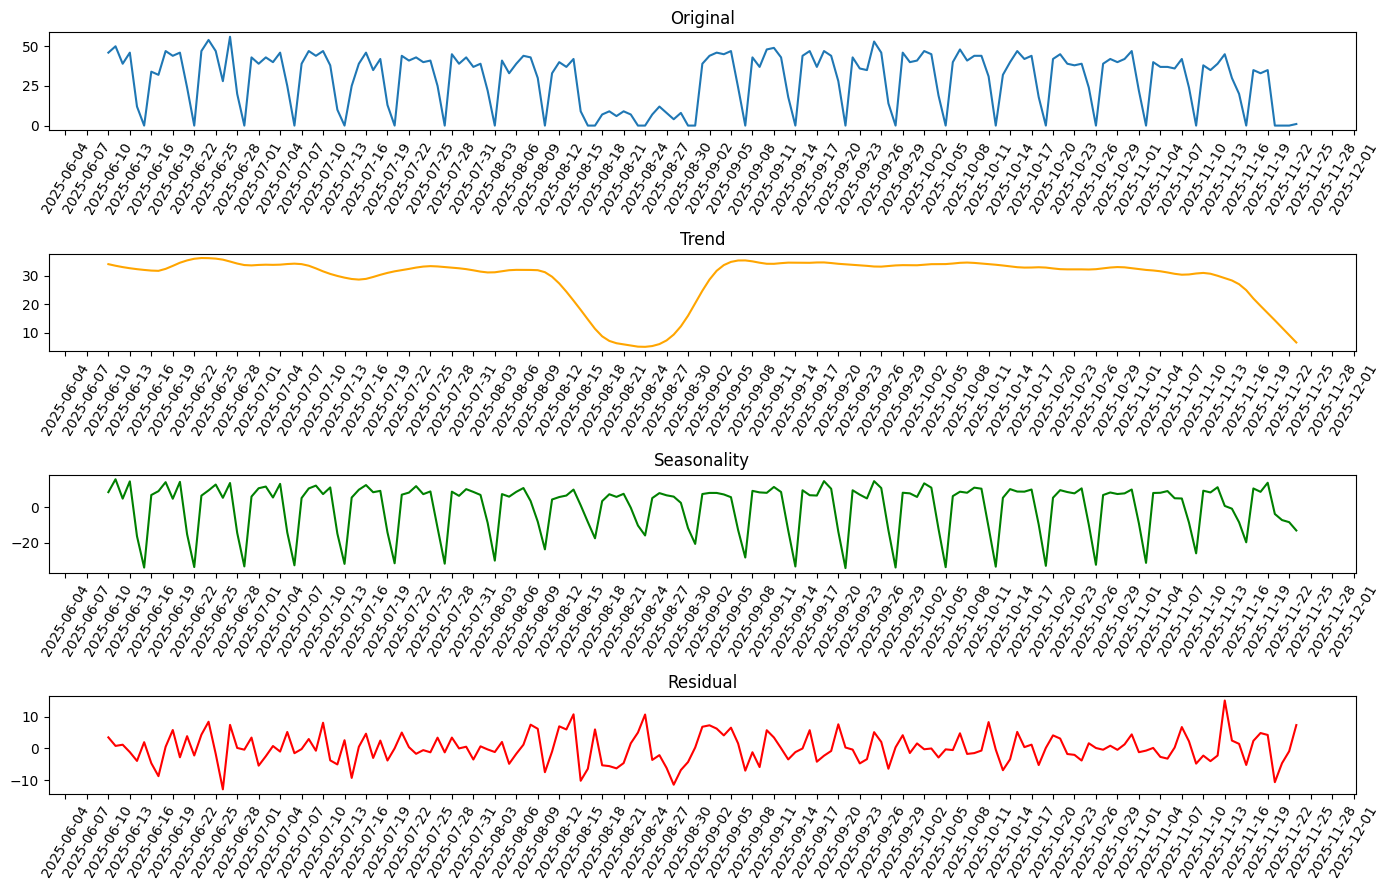

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import STL

# 1. Make sure datetime is proper datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# 2. Resample daily counts
daily_counts = df.resample('D', on='datetime').size()
daily_counts = daily_counts.asfreq('D', fill_value=0)  # fill missing days

# 3. STL decomposition
stl = STL(daily_counts, seasonal=7)  # 7 for weekly seasonality (adjust if needed)
result = stl.fit()

# 4. Plot the components
plt.figure(figsize=(14,9))

plt.subplot(4,1,1)
plt.plot(daily_counts, label='Original')
plt.title('Original')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(4,1,2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(4,1,3)
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.subplot(4,1,4)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual')
plt.xticks(rotation=60)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.tight_layout()
plt.show()


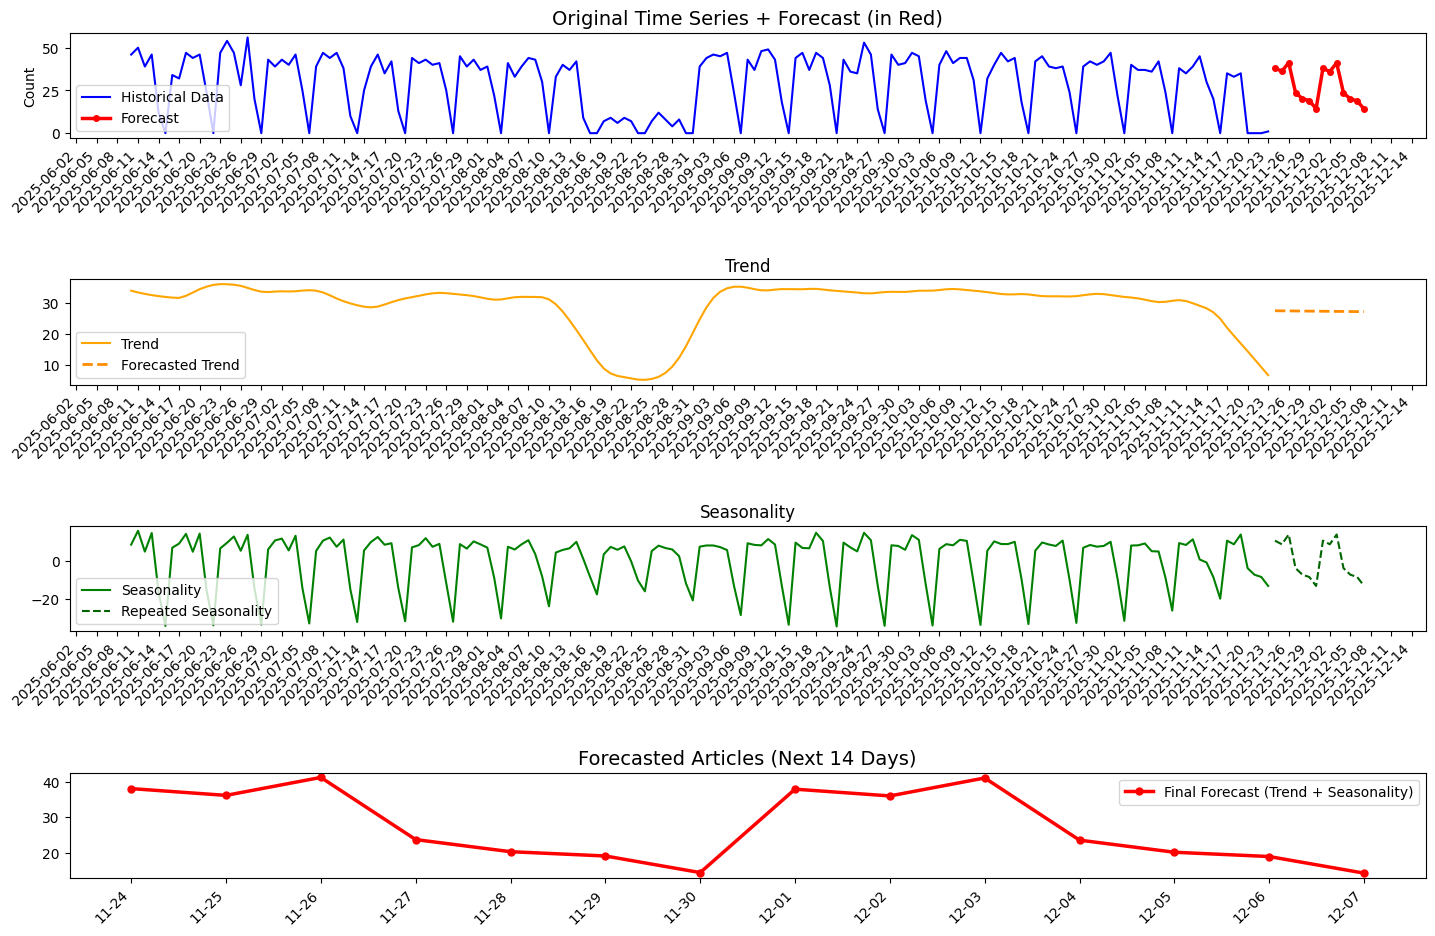

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression

# ----------------------------
# 1. Prepare daily counts
# ----------------------------
df['datetime'] = pd.to_datetime(df['datetime'])
# Resample daily counts
daily_counts = df.resample('D', on='datetime').size()
daily_counts = daily_counts.asfreq('D', fill_value=0) # fill missing days
# ----------------------------
# 2. STL decomposition
# ----------------------------
stl = STL(daily_counts, seasonal=7) # weekly seasonality
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
resid = result.resid
# ----------------------------
# 3. Forecast trend (linear extrapolation)
# ----------------------------
trend_df = trend.reset_index()
trend_df.columns = ['day', 'trend'] # name columns properly
trend_df['t'] = np.arange(len(trend_df)) # time index for regression
X = trend_df['t'].values.reshape(-1,1)
y = trend_df['trend'].values # trend values
# Fit linear regression
model = LinearRegression()
model.fit(X, y)
# Forecast next n_days
n_days = 14
future_t = np.arange(len(trend_df), len(trend_df)+n_days).reshape(-1,1)
trend_forecast = model.predict(future_t)
# ----------------------------
# 4. Forecast seasonality (repeat last week)
# ----------------------------
seasonal_forecast = np.tile(seasonal[-7:], int(np.ceil(n_days/7)))[:n_days]
# ----------------------------
# 5. Combine trend + seasonal
# ----------------------------
forecast_series = pd.Series(trend_forecast + seasonal_forecast,
                            index=pd.date_range(daily_counts.index[-1] + pd.Timedelta(days=1),
                                                periods=n_days, freq='D'))


# ----------------------------
# 6. Plot everything — NOW WITH FORECAST IN RED ON ORIGINAL
# ----------------------------
plt.figure(figsize=(15, 10))

# SUBPLOT 1: Original + Forecast overlaid in RED
plt.subplot(4, 1, 1)
plt.plot(daily_counts, label='Historical Data', color='blue', linewidth=1.5)
plt.plot(forecast_series, label='Forecast', color='red', linewidth=2.5, marker='o', markersize=4)

plt.title('Original Time Series + Forecast (in Red)', fontsize=14)
plt.legend()
plt.ylabel('Count')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # adjust if too crowded
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

# SUBPLOT 2: Trend + forecasted trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.plot(forecast_series.index, trend_forecast, '--', label='Forecasted Trend', color='darkorange', linewidth=2)
plt.title('Trend')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

# SUBPLOT 3: Seasonality + repeated forecast
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.plot(forecast_series.index, seasonal_forecast, '--', label='Repeated Seasonality', color='darkgreen')
plt.title('Seasonality')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45, ha='right')

# SUBPLOT 4: Final Forecast only
plt.subplot(4, 1, 4)
plt.plot(forecast_series, label='Final Forecast (Trend + Seasonality)',
         color='red', linewidth=2.5, marker='o', markersize=5)
plt.title('Forecasted Articles (Next 14 Days)', fontsize=14)
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=45, ha='right')

plt.tight_layout(pad=3.0)
plt.show()

# **4. NLP**

##4.1 Embedding

In [ ]:
!pip install transformers torch scikit-learn hdbscan umap-learn matplotlib seaborn

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4912 entries, 0 to 4995
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                4912 non-null   int64         
 1   title             4912 non-null   object        
 2   body              4912 non-null   object        
 3   category          4912 non-null   object        
 4   datetime          4912 non-null   datetime64[ns]
 5   has_video         4912 non-null   int64         
 6   has_carousell     4912 non-null   int64         
 7   images_count      4784 non-null   float64       
 8   title_word_count  4912 non-null   int64         
 9   body_word_count   4912 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 551.2+ KB


### Semantic Article Recommendation for Armenian News  
### (Zero translation needed — works directly on Armenian text)

This notebook builds a **content-based recommender** that finds the most semantically similar Armenian news articles using **multilingual sentence embeddings** + **cosine similarity**.

No Armenian-specific NLP tools required — everything runs on a single multilingual model that understands Armenian out of the box.

### What the Code Actually Does (Step-by-Step)

| Step | What Happens | Why It Matters |
|------|--------------|----------------|
| 1    | Extract all article titles (or full texts) from your DataFrame → Python list | Input data for the model |
| 2    | Load the multilingual model  <br>`paraphrase-multilingual-MiniLM-L12-v2` | This model supports 50+ languages including **Armenian** and turns any text into a meaningful 384-dimensional vector |
| 3    | Encode every title → matrix of shape `(n_articles × 384)` | Each row is now a numeric “fingerprint” of the article’s meaning |
| 4    | Compute **cosine similarity** between a chosen article and all others | Measures how close two articles are in meaning (not just keywords) |
| 5    | Return the top-N most similar articles with their similarity scores | Ready-to-use recommendations |

### Cosine Similarity Formula (the math behind the ranking)

$$
\text{cosine_similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|} = \frac{\sum_{i=1}^{n} A_i B_i }{\sqrt{\sum_{i=1}^{n} A_i^2} \times \sqrt{\sum_{i=1}^{n} B_i^2}}
$$

- **+1** → identical meaning  
- **0**    → no semantic relation  
- **-1** → opposite meaning (rare with sentence embeddings)  
Typical “very similar” Armenian news titles score **0.70 – 0.95**

### How Recommendations Work

1. Pick any article index (e.g., `index_to_test = 42`)
2. The function calculates cosine similarity of that article against **every other article**
3. Sets self-similarity to -1 (so the article doesn’t recommend itself)
4. Sorts descending and returns the top N matches with titles and scores



Hugging Face Link
https://huggingface.co/sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2

In [ ]:

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


articles = df['title'].to_list()

# -------------------------------------------------------
# LOAD MULTILINGUAL EMBEDDING MODEL
# 'paraphrase-multilingual-MiniLM-L12-v2' works well for Armenian
# -------------------------------------------------------
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')


embeddings = model.encode(articles)

# -------------------------------------------------------
# FUNCTION: RECOMMEND SIMILAR ARTICLES
# -------------------------------------------------------
def recommend_similar(article_idx, embeddings, articles, top_n=4):
    # Compute cosine similarity of chosen article with all articles
    sims = cosine_similarity([embeddings[article_idx]], embeddings)[0]

    # ignore the article itself
    sims[article_idx] = -1

    # get top-N most similar articles
    top_indices = sims.argsort()[-top_n:][::-1]

    # return results
    return [(i, articles[i], sims[i]) for i in top_indices]




/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

##4.2 News recommendation System

In [ ]:
def print_armenian_news_recommendation(article_idx, embeddings, articles, top_n=4):
    # Get recommendations (skip the article itself)
    recs = recommend_similar(article_idx, embeddings, articles, top_n=top_n + 5)
    recs = [r for r in recs if r[0] != article_idx][:top_n]

    # Header with Armenian touch
    print("\n" + "═" * 80)
    print(" " * 22 + "ՀԱՅԱՍՏԱՆԻ ՆՈՐՈՒԹՅՈՒՆՆԵՐ" + " " * 22)  # "ARMENIAN NEWS" in Armenian
    print(" " * 28 + "Խելացի առաջարկություններ 🇦🇲")          # "Smart recommendations"
    print("═" * 80)

    # Original article
    print(f"\n🔥 ԳԼԽԱՎՈՐ ՆՅՈՒԹԸ (Հոդված #{article_idx})\n")
    print("📰", articles[article_idx][:600].strip())
    if len(articles[article_idx]) > 600:
        print("   ... (կարդալ ավելին)")

    # Recommendations
    print("\n" + "━" * 80)
    print("✨ ՁԵԶ ՀԵՏՔՐՔՐԵՑՆՈՂ ԿԼԻՆԵՆ ՆԱԵՎ ՍՐԵՆՔ")  # "You may also like these"
    print("━" * 80 + "\n")

    medals = ["🥇 1-ին", "🥈 2-րդ", "🥉 3-րդ", "4-րդ"]
    for i, (idx, text, score) in enumerate(recs):
        bar = "█" * int(score * 50)
        spaces = " " * (50 - len(bar))
        print(f"{medals[i]}  Համապատասխանություն՝ {score:.4f}   {bar}{spaces}  {score*100:5.1f}%")
        print(f"   📄 Հոդված #{idx}")
        print(f"   ➤ {text.strip()[:320]}")
        if len(text) > 320:
            print("   ...")
        print("")

print_armenian_news_recommendation(100, embeddings, articles, top_n=4)


════════════════════════════════════════════════════════════════════════════════
                      ՀԱՅԱՍՏԱՆԻ ՆՈՐՈՒԹՅՈՒՆՆԵՐ                      
                            Խելացի առաջարկություններ 🇦🇲
════════════════════════════════════════════════════════════════════════════════

🔥 ԳԼԽԱՎՈՐ ՆՅՈՒԹԸ (Հոդված #100)

📰 Երևանում ավտոբուսի վարորդը բռնության է ենթարկվել

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✨ ՁԵԶ ՀԵՏՔՐՔՐԵՑՆՈՂ ԿԼԻՆԵՆ ՆԱԵՎ ՍՐԵՆՔ
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

🥇 1-ին  Համապատասխանություն՝ 0.7088   ███████████████████████████████████                  70.9%
   📄 Հոդված #3881
   ➤ Շղթայական վթար Երևանում՝ համար 97 ավտոբուսի մասնակցությամբ

🥈 2-րդ  Համապատասխանություն՝ 0.6420   ████████████████████████████████                     64.2%
   📄 Հոդված #4439
   ➤ Ասատրյան․ Ուղևորը վարորդից պահանջել է ավտոբուսը վարել իր ասած ուղղությամբ

🥉 3-րդ  Համապատասխանություն՝ 0.6312   ███████████████